In [1]:
import sqlite3
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 100)  # Change 100 to your preferred number of rows.
pd.set_option('display.max_columns', 50)  # Change 50 to your preferred number of columns.

In [3]:
database_filepath = "./accident_data_v1.0.0_2023.db"

In [4]:
with sqlite3.connect(database_filepath) as conn:
    cursor = conn.cursor()
    query = """SELECT name FROM sqlite_master WHERE type='table';"""
    res = cursor.execute(query).fetchall()
    print(res)
    cursor.close()

[('accident',), ('casualty',), ('vehicle',), ('lsoa',)]


In [5]:
output = []
table_names = ['accident', 'casualty', 'vehicle', 'lsoa']
with sqlite3.connect(database=database_filepath) as conn:
    cursor = conn.cursor()
    for table_name in table_names:
        query = f"PRAGMA table_info({table_name});"
        res = cursor.execute(query).fetchall()
        output.append(res)
    cursor.close()

In [6]:
print("ACCIDENT")
print("-----------------------")
output[0]

ACCIDENT
-----------------------


[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [7]:
print("CASUALTY")
print("-----------------------")
output[1]

CASUALTY
-----------------------


[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [8]:
print("VEHICLE")
print("-----------------------")
output[2]

VEHICLE
-----------------------


[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [9]:
print("LSOA")
print("-----------------------")
output[3]

LSOA
-----------------------


[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

In [10]:
df_accident = None
with sqlite3.connect(database_filepath) as conn:
    query = """SELECT * FROM accident;"""
    df_accident = pd.read_sql_query(query, conn)
    
df_accident

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,7,03:12,32,E09000010,E09000010,3,105,6,30,0,-1,-1,-1,0,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,1,01:30,1,E09000033,E09000033,3,5,6,30,3,4,6,0,0,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,1,00:30,5,E09000030,E09000030,3,13,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,1,01:11,32,E09000010,E09000010,3,1010,1,30,1,4,4,154,0,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,1,01:42,4,E09000012,E09000012,3,107,3,20,6,2,3,10,0,5,4,1,2,0,0,1,1,2,E01001808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
461348,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
461349,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
461350,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [11]:
df_accident.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,461352.000000,461236.000000,4.612360e+05,461226.000000,461226.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000
mean,2018.368378,452593.115756,2.801803e+05,-1.246998,52.408849,28.193388,2.784436,1.840441,1.301245,4.108171,324.427242,4.213852,773.579577,5.200413,36.898871,3.193629,1.748006,2.697335,220.470081,0.262112,1.099518,2.036235,1.649918,1.385239,0.217519,0.170518,1.325463,1.334877,1.680147
std,1.091566,94822.718705,1.515501e+05,1.389702,1.365101,24.801609,0.443648,0.709869,0.746398,1.927216,256.810667,1.465905,1575.278195,1.698629,14.013945,9.635082,2.535687,3.137408,927.475025,1.460680,2.333113,1.724691,1.819426,0.955180,1.240981,1.121964,0.469057,0.556352,0.851554
min,2017.000000,64084.000000,1.023500e+04,-7.525273,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2017.000000,388539.000000,1.755300e+05,-2.172668,51.465689,5.000000,3.000000,1.000000,1.000000,2.000000,82.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2018.000000,459198.500000,2.208650e+05,-1.126264,51.870257,22.000000,3.000000,2.000000,1.000000,4.000000,303.000000,4.000000,27.000000,6.000000,30.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2019.000000,529290.000000,3.865510e+05,-0.136389,53.372899,45.000000,3.000000,2.000000,1.000000,6.000000,512.000000,6.000000,514.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.000000,655391.000000,1.209512e+06,1.759641,60.763722,99.000000,3.000000,24.000000,59.000000,7.000000,941.000000,6.000000,9176.000000,9.000000,70.000000,99.000000,9.000000,9.000000,9177.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


In [12]:
df_accident.isna().sum()

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          116
location_northing_osgr                         116
longitude                                      126
latitude                                       126
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [13]:
df_accident["time"]

0         03:12
1         01:30
2         00:30
3         01:11
4         01:42
          ...  
461347    14:30
461348    15:05
461349    12:42
461350    14:00
461351    13:50
Name: time, Length: 461352, dtype: object

In [14]:
df_accident["day_of_week"]

0         7
1         1
2         1
3         1
4         1
         ..
461347    4
461348    6
461349    4
461350    3
461351    3
Name: day_of_week, Length: 461352, dtype: int64

In [15]:
df_accident["date"]

0         05/08/2017
1         01/01/2017
2         01/01/2017
3         01/01/2017
4         01/01/2017
             ...    
461347    12/08/2020
461348    13/11/2020
461349    15/04/2020
461350    15/12/2020
461351    25/08/2020
Name: date, Length: 461352, dtype: object

<Axes: xlabel='count', ylabel='day_of_week'>

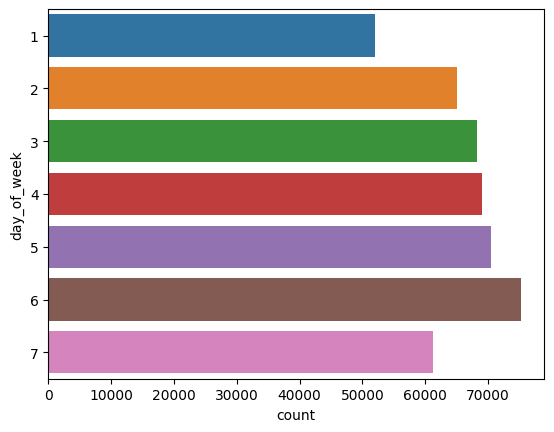

In [16]:
sns.countplot(df_accident, y='day_of_week')

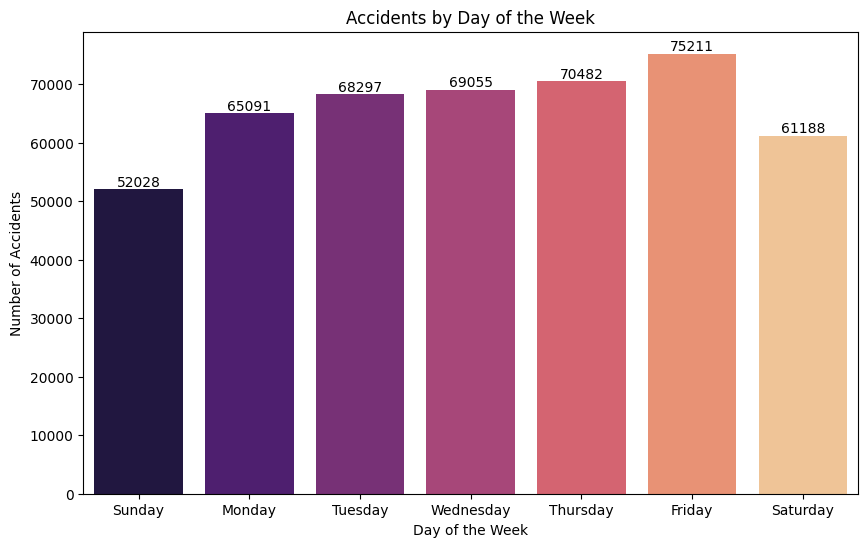

In [39]:
# Analyzing accidents by day of the week

# Plot accidents by day of the week
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_accident, x='day_of_week', palette='magma')
ax.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, # Center of the bar
        bar.get_height() + 0.5, # Slightly above the top of the bar
        int(bar.get_height()), # Display the ount
        ha = 'center', # Horizontal alignment
        va = 'bottom' # Vertical alighnment
    )
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

In [ ]:
df_accident['time'] = pd.to_datetime(df_accident['time'], format='%H:%M').dt.time
df_accident['time']

In [ ]:
# Convert 'time' to minutes since midnight for numerical plotting
df_accident['minutes_from_midnight'] = df_accident['time'].apply(lambda x: x.hour * 60 + x.minute)

# Plot the distribution using Seaborn
sns.histplot(df_accident['minutes_from_midnight'], bins=20, kde=True)
plt.xlabel('Minutes from Midnight')
plt.ylabel('Frequency')
plt.title('Distribution of Time')

plt.show()


# Assignment begins bitchesss

In [40]:
query = """
    SELECT *
    FROM accident AS a
    JOIN casualty AS c ON a.accident_index = c.accident_index
    JOIN vehicle AS v ON a.accident_index = v.accident_index
    JOIN lsoa AS l ON a.lsoa_of_accident_location = l.lsoa01cd
    WHERE a.accident_year = 2020;
"""

In [41]:
df = None
with sqlite3.connect(database_filepath) as conn:
    cursor = conn.cursor()
    df = pd.read_sql_query(query, conn)
    

df = df.loc[:, ~df.columns.duplicated()]
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,...,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,...,0,0,0,0,0,0,4,9,6,2,32,6,1968,2,6,AUDI Q5,4,1,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,...,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1,3034,E01003034,Lambeth 012A,Lambeth 012A,1.146984e+05,1719.140860,cb2e7f50-252f-469e-9b13-a56794f5d5d6
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,...,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1,3034,E01003034,Lambeth 012A,Lambeth 012A,1.146984e+05,1719.140860,cb2e7f50-252f-469e-9b13-a56794f5d5d6
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,...,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,4726,E01004726,Westminster 003C,Westminster 003C,1.857269e+05,2698.692831,e5cccc5e-7d0c-4f89-82c3-2a5d03b1ae18
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,...,0,0,0,0,0,0,1,1,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1,3617,E01003617,Newham 012B,Newham 012B,2.326906e+05,3013.438191,3e1979c9-8863-4982-afa5-7a6de00635d7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,6,12/12/2020,7,17:30,753,W06000023,W06000023,3,44,6,60,0,-1,0,-1,...,0,0,0,0,0,0,0,1,6,1,19,4,1598,2,8,AUDI A3,6,3,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201939,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,6,12/12/2020,7,17:30,753,W06000023,W06000023,3,44,6,60,0,-1,0,-1,...,0,0,1,0,0,0,3,1,6,1,23,5,2521,1,13,FORD FOCUS,6,3,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201940,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,6,12/12/2020,7,17:30,753,W06000023,W06000023,3,44,6,60,0,-1,0,-1,...,0,0,1,0,1,10,1,1,6,1,51,8,3200,2,12,MITSUBISHI SHOGUN,7,3,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201941,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,6,12/12/2020,7,17:30,753,W06000023,W06000023,3,44,6,60,0,-1,0,-1,...,0,0,0,11,0,0,0,1,6,1,57,9,1995,2,12,BMW 3 SERIES,6,2,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef


In [42]:
df.isna().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

- No NaN values present

In [43]:
# Create a connection to the SQLite database (or create a new one)
conn = sqlite3.connect('accident_2020.db')

# Save the DataFrame to a table in the SQLite database
df.to_sql('consolidated_table', conn, if_exists='replace', index=False)

# Confirm the table has been saved by querying it
result = pd.read_sql_query("SELECT * FROM consolidated_table", conn)

# Close the connection
conn.close()

result # Prints result

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,...,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,...,0,0,0,0,0,0,4,9,6,2,32,6,1968,2,6,AUDI Q5,4,1,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,...,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1,3034,E01003034,Lambeth 012A,Lambeth 012A,1.146984e+05,1719.140860,cb2e7f50-252f-469e-9b13-a56794f5d5d6
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,...,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1,3034,E01003034,Lambeth 012A,Lambeth 012A,1.146984e+05,1719.140860,cb2e7f50-252f-469e-9b13-a56794f5d5d6
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,...,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,4726,E01004726,Westminster 003C,Westminster 003C,1.857269e+05,2698.692831,e5cccc5e-7d0c-4f89-82c3-2a5d03b1ae18
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,...,0,0,0,0,0,0,1,1,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1,3617,E01003617,Newham 012B,Newham 012B,2.326906e+05,3013.438191,3e1979c9-8863-4982-afa5-7a6de00635d7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,6,12/12/2020,7,17:30,753,W06000023,W06000023,3,44,6,60,0,-1,0,-1,...,0,0,0,0,0,0,0,1,6,1,19,4,1598,2,8,AUDI A3,6,3,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201939,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,6,12/12/2020,7,17:30,753,W06000023,W06000023,3,44,6,60,0,-1,0,-1,...,0,0,1,0,0,0,3,1,6,1,23,5,2521,1,13,FORD FOCUS,6,3,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201940,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,6,12/12/2020,7,17:30,753,W06000023,W06000023,3,44,6,60,0,-1,0,-1,...,0,0,1,0,1,10,1,1,6,1,51,8,3200,2,12,MITSUBISHI SHOGUN,7,3,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201941,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,6,12/12/2020,7,17:30,753,W06000023,W06000023,3,44,6,60,0,-1,0,-1,...,0,0,0,11,0,0,0,1,6,1,57,9,1995,2,12,BMW 3 SERIES,6,2,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef


In [44]:
df2 = df # Keeping a copy of df just to be safe

In [57]:
df = df2

In [58]:
df['date'].unique()

array([datetime.date(2020, 2, 4), datetime.date(2020, 4, 27),
       datetime.date(2020, 1, 1), datetime.date(2020, 1, 2),
       datetime.date(2020, 1, 3), datetime.date(2020, 1, 4),
       datetime.date(2020, 1, 5), datetime.date(2020, 1, 6),
       datetime.date(2020, 1, 7), datetime.date(2020, 1, 8),
       datetime.date(2020, 1, 9), datetime.date(2020, 1, 10),
       datetime.date(2020, 1, 11), datetime.date(2020, 1, 12),
       datetime.date(2020, 1, 13), datetime.date(2020, 1, 14),
       datetime.date(2020, 1, 15), datetime.date(2020, 1, 16),
       datetime.date(2020, 1, 17), datetime.date(2020, 1, 18),
       datetime.date(2020, 1, 19), datetime.date(2020, 1, 20),
       datetime.date(2020, 1, 21), datetime.date(2020, 1, 22),
       datetime.date(2020, 1, 23), datetime.date(2020, 1, 24),
       datetime.date(2020, 1, 25), datetime.date(2020, 1, 26),
       datetime.date(2020, 1, 27), datetime.date(2020, 6, 3),
       datetime.date(2020, 1, 28), datetime.date(2020, 1, 29),
   

In [59]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.date
df['date']

0         2020-02-04
1         2020-04-27
2         2020-04-27
3         2020-01-01
4         2020-01-01
             ...    
201938    2020-12-12
201939    2020-12-12
201940    2020-12-12
201941    2020-12-12
201942    2020-12-12
Name: date, Length: 201943, dtype: object

In [65]:
df['time']

0         09:00:00
1         13:55:00
2         13:55:00
3         01:25:00
4         01:50:00
            ...   
201938    17:30:00
201939    17:30:00
201940    17:30:00
201941    17:30:00
201942    17:30:00
Name: time, Length: 201943, dtype: object

In [64]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df['time']

AttributeError: 'DatetimeProperties' object has no attribute 'datetime'

## 1. Are there significant hours of day, and days of the week, on which accidents occur?

### 1.1 Significant hours of the day

In [63]:
df['hour'] = df['time'].dt.hour
sns.histplot(df['hour'], bins=24, kde=True)

AttributeError: Can only use .dt accessor with datetimelike values

In [69]:
df_accident['accident_index'].nunique(), df_accident.shape

(461352, (461352, 36))